In [1]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt
import skimage.transform as trans
from skimage.io import imread

from preprocess import extract, preprocess, test_train_split

import warnings
warnings.filterwarnings("ignore")

# (1) Extract from LIDC_IDRI raw dataset

In [ ]:
# # 1.1: clear out old data
# shutil.rmtree('data/prepared')

In [ ]:
# # 1.2: download from s3
# extract('../raw_data/', 'data/prepared', extract_all=True)

91


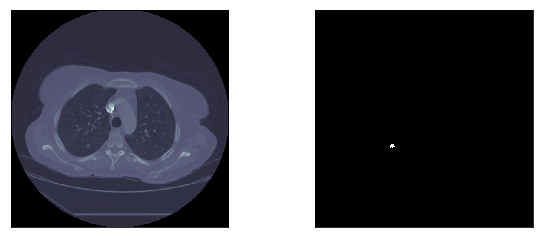

In [2]:
# 1.3: visualize

idx = np.random.randint(len(os.listdir('data/prepared/image1')))

img = imread(f'data/prepared/image1/{idx}.tif') 
mask = imread(f'data/prepared/label1/{idx}.tif') 

print(idx)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(np.array(img), cmap='bone')
axs[1].imshow(np.array(mask), cmap='bone')

axs[0].set_xticks([], [])
axs[1].set_xticks([], [])
axs[0].set_yticks([], [])
axs[1].set_yticks([], [])


plt.show()

# (2) Preprocess

In [2]:
# 2.1: clear out old data
shutil.rmtree('data/processed')

In [3]:
# 2.2 process
preprocess('data/prepared', 'data/processed')

Empty lung field returned for image 211. Skipping
Empty lung field returned for image 321. Skipping
Empty lung field returned for image 480. Skipping
Processing...596/596
Complete.


27


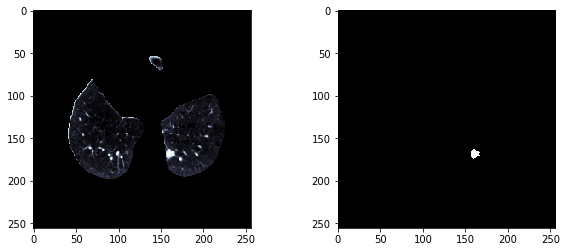

In [6]:
# 2.3: visualize

idx = np.random.randint(len(os.listdir('data/processed/image1')))
# idx = 0
img = imread(f'data/processed/image1/{idx}.tif') 
mask = imread(f'data/processed/label1/{idx}.tif') 

print(idx)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(np.array(img), cmap='bone')
axs[1].imshow(np.array(mask), cmap='bone')
plt.show()

# (3) Remove bad Images

Number of bad images: 44
307.tif


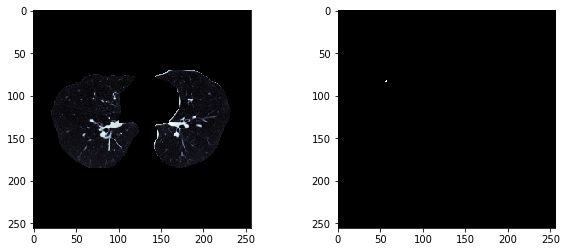

In [8]:
bad_ims = set()
for i in range(4):
    for idx in os.listdir(f'data/processed/image{i}'):
        im = imread(f'data/processed/image{i}/{idx}') 
        mask = imread(f'data/processed/label{i}/{idx}') 
        mask_pixels = im.flatten()[np.argwhere(mask.flatten()>0)]
        # remove if < 10% of mask in image
        if np.count_nonzero(mask_pixels) < (1/10)*mask_pixels.size:
            bad_ims.add(idx)

bad_ims = list(bad_ims)
                          
print(f"Number of bad images: {len(bad_ims)}")

# visualize bad images
bad_idx = bad_ims[np.random.randint(len(bad_ims))]
bad_img = imread(f'data/processed/image{1}/{bad_idx}') 
bad_mask = imread(f'data/processed/label{1}/{bad_idx}') 

print(bad_idx)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(np.array(bad_img), cmap='bone')
axs[1].imshow(np.array(bad_mask), cmap='bone')
plt.show()

In [9]:
for bad_im in bad_ims:
    for i in range(4):
        os.remove(f'data/processed/image{i}/{bad_im}')
        os.remove(f'data/processed/label{i}/{bad_im}')

# (4) Split into test and train

In [10]:
# 3.1: clear out old data
shutil.rmtree('data/train')
shutil.rmtree('data/test')

In [11]:
# 3.2: split
test_train_split('data/processed', 'data/train', 'data/test')

272


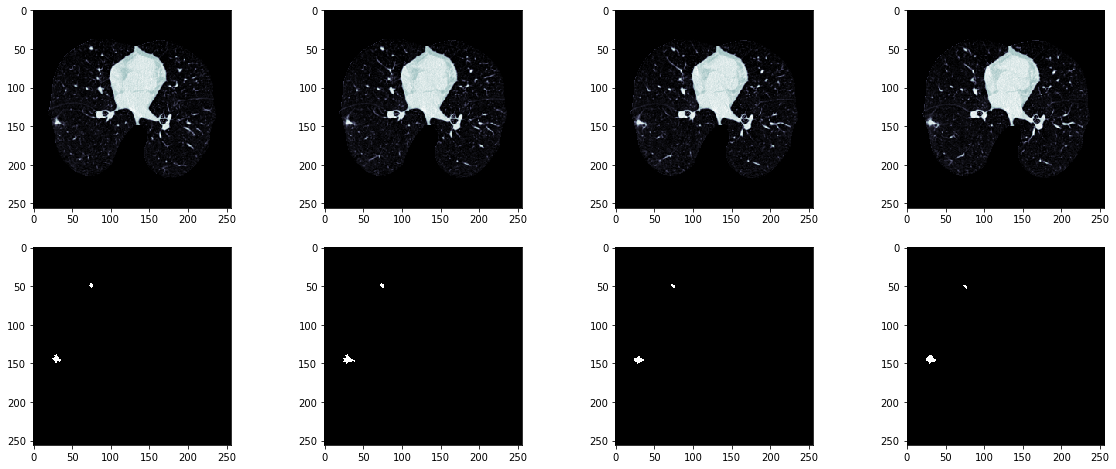

In [12]:
# 3.3a: Inspect prepared training data 
train_idx = np.random.randint(len(os.listdir('data/train/image1')))
print(train_idx)

train_img_0 = imread(f'data/train/image0/{train_idx}.tif')
train_img_1 = imread(f'data/train/image1/{train_idx}.tif')
train_img_2 = imread(f'data/train/image2/{train_idx}.tif')
train_img_3 = imread(f'data/train/image3/{train_idx}.tif')

train_mask_0 =  imread(f'data/train/label0/{train_idx}.tif')
train_mask_1 =  imread(f'data/train/label1/{train_idx}.tif')
train_mask_2 =  imread(f'data/train/label2/{train_idx}.tif')
train_mask_3 =  imread(f'data/train/label3/{train_idx}.tif')



fig, axs = plt.subplots(2, 4, figsize=(20, 8))
axs[0][0].imshow(train_img_0, cmap='bone')
axs[0][1].imshow(train_img_1, cmap='bone')
axs[0][2].imshow(train_img_2, cmap='bone')
axs[0][3].imshow(train_img_3, cmap='bone')

axs[1][0].imshow(train_mask_0, cmap='bone')
axs[1][1].imshow(train_mask_1, cmap='bone')
axs[1][2].imshow(train_mask_2, cmap='bone')
axs[1][3].imshow(train_mask_3, cmap='bone')


plt.show()

23


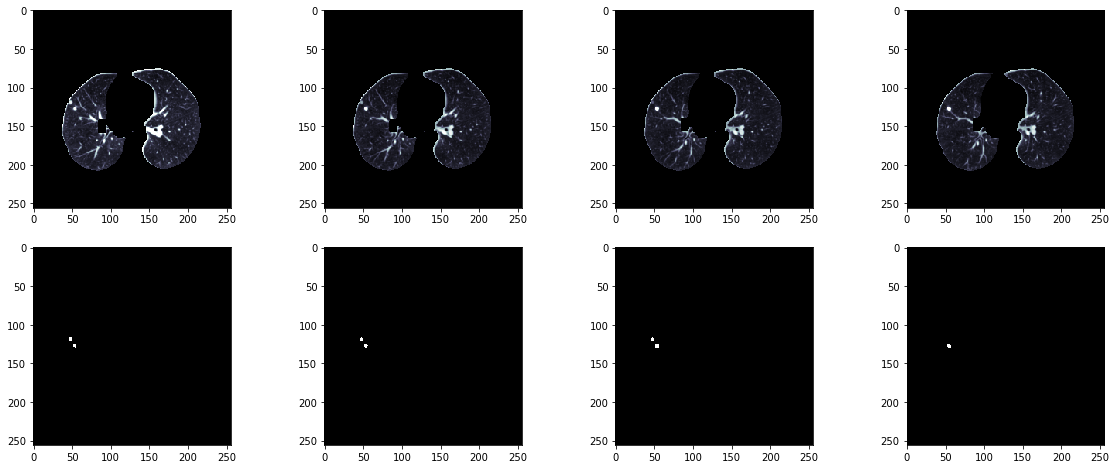

In [13]:
# 3.3b: Inspect prepared training data 

test_idx = np.random.randint(len(os.listdir('data/test/image1')))
print(test_idx)

test_img_0 = imread(f'data/test/image0/{test_idx}.tif')
test_img_1 = imread(f'data/test/image1/{test_idx}.tif')
test_img_2 = imread(f'data/test/image2/{test_idx}.tif')
test_img_3 = imread(f'data/test/image3/{test_idx}.tif')


test_mask_0 =  imread(f'data/test/label0/{test_idx}.tif')
test_mask_1 =  imread(f'data/test/label1/{test_idx}.tif')
test_mask_2 =  imread(f'data/test/label2/{test_idx}.tif')
test_mask_3 =  imread(f'data/test/label3/{test_idx}.tif')


fig, axs = plt.subplots(2, 4, figsize=(20, 8))
axs[0][0].imshow(test_img_0, cmap='bone')
axs[0][1].imshow(test_img_1, cmap='bone')
axs[0][2].imshow(test_img_2, cmap='bone')
axs[0][3].imshow(test_img_3, cmap='bone')

axs[1][0].imshow(test_mask_0, cmap='bone')
axs[1][1].imshow(test_mask_1, cmap='bone')
axs[1][2].imshow(test_mask_2, cmap='bone')
axs[1][3].imshow(test_mask_3, cmap='bone')


plt.show()